<a href="https://colab.research.google.com/github/Nirhoshan/Image-Processing/blob/main/assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline


Part 1

In [15]:
def accuracy(labels,preds):
  real_cls=np.argmax(labels,axis=1)
  pred_cls=np.argmax(preds, axis=1)  
  valid_pred=[pred_cls==real_cls]
  acc=100*np.sum(valid_pred)/len(real_cls)
  return acc

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('Reshaped x_train: ', x_train.shape)


x_train:  (50000, 32, 32, 3)
Reshaped x_train:  (50000, 3072)


In [17]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations = 300
lr = 1.0e-2
lr_decay= 0.999
reg =5e-6
print(lr)
print(lr_decay)

train_loss_history = []
test_loss_history = []
lr_history=[]
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations): 
  # Forward pass
  y_pred=np.dot(x_train,w1)+b1
  train_loss=np.sum((y_pred-y_train)**2)/Ntr + reg*np.sum(w1**2)  
  train_loss_history.append(train_loss)
  test_loss=np.sum((np.dot(x_test,w1)+b1-y_test)**2)/Nte + reg*np.sum(w1**2)  
  test_loss_history.append(test_loss)

  # Backward pass
  dw1 = 2*(1/Ntr)*(x_train.T.dot(y_pred - y_train))  + 2*reg*w1 
  w1 = w1 - lr*dw1
  I=np.ones((Ntr,1))
  db1=2*(1/Ntr)*(I.T.dot(y_pred - y_train))
  b1=b1-lr*db1

  #Accuracies
  train_acc = accuracy(y_train,y_pred)
  #train_acc=1.0-(1/Ntr)*(np.absolute(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
  train_acc_history.append(train_acc)
  test_acc = accuracy( y_test, np.dot(x_test,w1)+b1)
  #test_acc=1.0-(1/Nte)*(np.absolute(np.argmax(y_test,axis=1)-np.argmax(np.dot(x_test,w1)+b1,axis=1))).sum()/K
  val_acc_history.append(test_acc)
  lr=lr*lr_decay
  if (t%30==0) or (t==1) or t==iterations-1:
    print("Epoch {:03} - Train_Loss {:.4f} - Training Accuracy: {:.3f} - Testing Accuracy: {:.3f} - Learning Rate: {:.5f}"
              .format(t,train_loss,train_acc,test_acc,lr))
  lr_history.append(lr)
  lr=lr*lr_decay
print("Done")
#indices = np.arange(Ntr)
#rng.shuffle(indices)


# Printing accuracies and displaying w as images

w1: (3072, 10)
b1: (10,)
0.01
0.999
Epoch 000 - Train_Loss 1.0000 - Training Accuracy: 10.312 - Testing Accuracy: 24.850 - Learning Rate: 0.00999
Epoch 001 - Train_Loss 0.9625 - Training Accuracy: 24.404 - Testing Accuracy: 28.600 - Learning Rate: 0.00997
Epoch 030 - Train_Loss 0.8403 - Training Accuracy: 37.400 - Testing Accuracy: 37.450 - Learning Rate: 0.00941
Epoch 060 - Train_Loss 0.8115 - Training Accuracy: 38.862 - Testing Accuracy: 38.760 - Learning Rate: 0.00886
Epoch 090 - Train_Loss 0.8007 - Training Accuracy: 39.616 - Testing Accuracy: 39.230 - Learning Rate: 0.00834
Epoch 120 - Train_Loss 0.7958 - Training Accuracy: 40.116 - Testing Accuracy: 39.510 - Learning Rate: 0.00786
Epoch 150 - Train_Loss 0.7930 - Training Accuracy: 40.452 - Testing Accuracy: 39.610 - Learning Rate: 0.00740
Epoch 180 - Train_Loss 0.7911 - Training Accuracy: 40.678 - Testing Accuracy: 39.610 - Learning Rate: 0.00697
Epoch 210 - Train_Loss 0.7897 - Training Accuracy: 40.920 - Testing Accuracy: 39.740

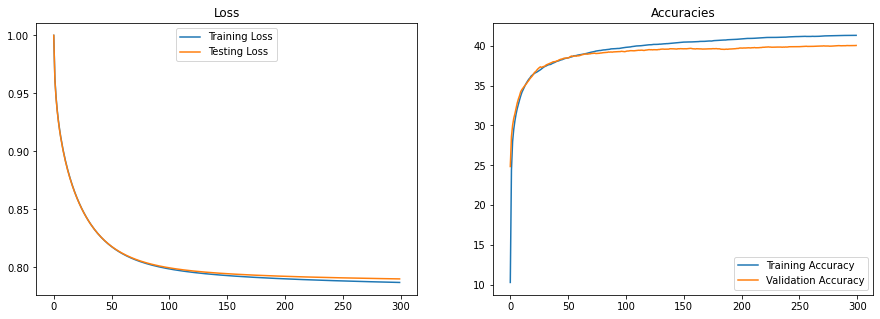

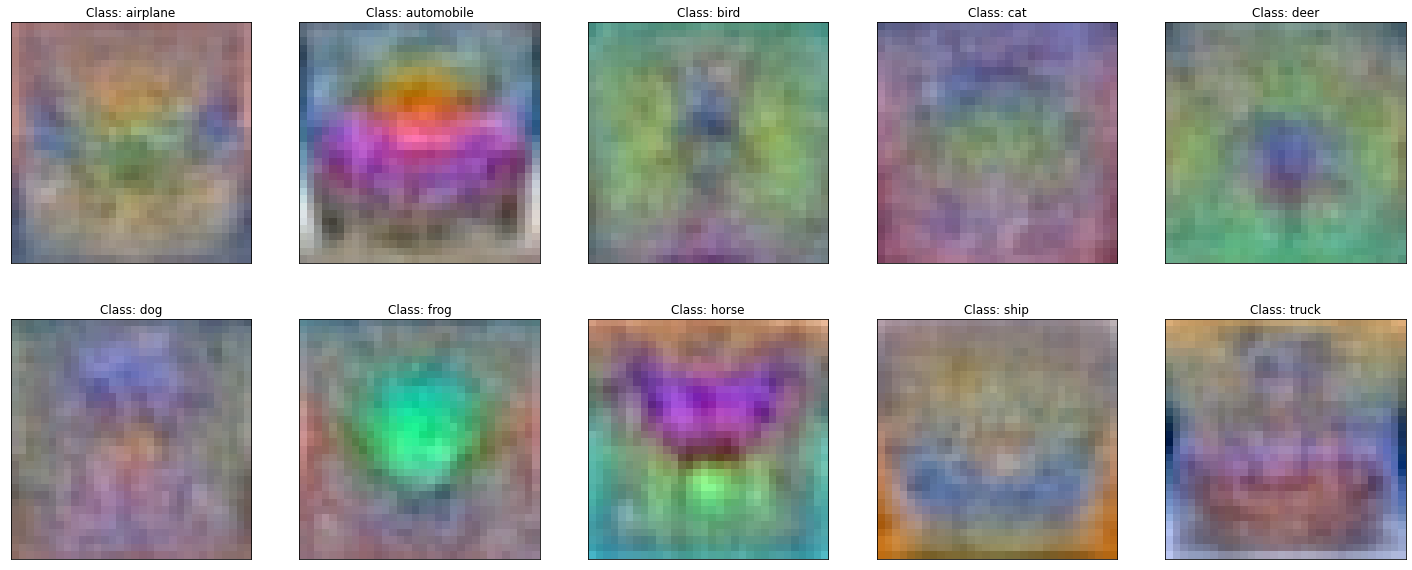

In [18]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(train_loss_history, label = 'Training Loss')
ax[0].plot(test_loss_history, label = 'Testing Loss')
ax[0].legend(loc ='upper center')
ax[0].set_title('Loss')
ax[1].plot(train_acc_history, label = 'Training Accuracy')
ax[1].plot(val_acc_history, label = 'Validation Accuracy')
ax[1].legend(loc='lower right')
ax[1].set_title('Accuracies')
plt.show()

# -------------------Showing the weights matrix W1 as 10 images-----------------
weights = w1 # Removing the row of bias terms.
weights_pos =  weights- np.min(weights)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
CIFAR10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title("Class: {}".format(CIFAR10[i])),plt.xticks([]),plt.yticks([])    
    location+=1

Part 2

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
batch_size = Ntr

iterations = 300    
lr=1.0e-2 #0.005
lr_decay = 0.999
reg = 5e-6
train_loss_history = []
test_loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
t0 = time.time()
for t in range(iterations):
    batch_indices= np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    train_loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    train_loss_history.append(train_loss)    
    dy_pred = (1.0/batch_size)*2.0*(y_pred-y)

    xt2=x_test
    #print('xt',xt.shape)
    h2=1/(1+np.exp(-(xt2.dot(w1)+b1)))
    y_pred2=h2.dot(w2)+b2
    test_loss = (1./Nte)*np.square(y_pred2-y_test).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    test_loss_history.append(test_loss)

    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2

    #Accuracies
    xt=x_train
    #print('xt',xt.shape)
    h=1/(1+np.exp(-(xt.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2


    #train_acc= 1-1/Ntr *(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
    train_acc = accuracy(y_train,y_pred)
    train_acc_history.append(train_acc)
    #print('train_acc',train_acc)

    xt=x_test
    #print('xt',xt.shape)
    h=1/(1+np.exp(-(xt.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    #test_acc= 1-1/Nte *(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
    test_acc = accuracy(y_test, y_pred)    
    val_acc_history.append(test_acc)
    

    if t%30 == 0 or t==iterations-1:
        print("Epoch {:03} - Train Loss {:.4f} - Training Accuracy: {:.3f} - Testing Accuracy: {:.3f} - Learning Rate: {:.5f}"
              .format(t,train_loss,train_acc,test_acc,lr))
    
    lr = lr*lr_decay
t1 = time.time()
print('End of Training. time taken: %.2f seconds'  % (t1-t0))
print("Done")

x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 000 - Train Loss 1.0000 - Training Accuracy: 10.000 - Testing Accuracy: 10.000 - Learning Rate: 0.01000
Epoch 030 - Train Loss 0.8358 - Training Accuracy: 29.098 - Testing Accuracy: 28.970 - Learning Rate: 0.00970
Epoch 060 - Train Loss 0.8211 - Training Accuracy: 32.338 - Testing Accuracy: 32.380 - Learning Rate: 0.00942
Epoch 090 - Train Loss 0.7947 - Training Accuracy: 37.040 - Testing Accuracy: 37.000 - Learning Rate: 0.00914
Epoch 120 - Train Loss 0.7864 - Training Accuracy: 40.434 - Testing Accuracy: 40.080 - Learning Rate: 0.00887
Epoch 150 - Train Loss 0.7792 - Training Accuracy: 41.550 - Testing Accuracy: 40.780 - Learning Rate: 0.00861
Epoch 180 - Train Loss 0.7656 - Training Accuracy: 43.020 - Testing Accuracy: 41.670 - Learning Rate: 0.00835
Epoch 210 - Train Loss 0.7594 - Training Accuracy: 43.908 - Testing Accuracy: 42.550 - Learning Rate: 0.00810
Epoch 240 - Train Loss 0.7570 - Training

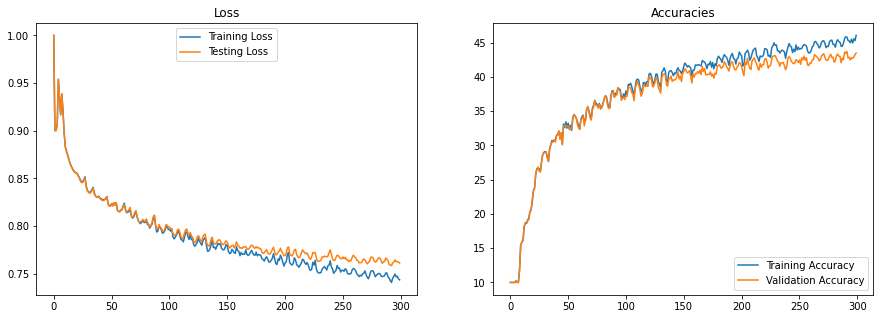

In [8]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(train_loss_history, label = 'Training Loss')
ax[0].plot(test_loss_history, label = 'Testing Loss')
ax[0].legend(loc ='upper center')
ax[0].set_title('Loss')
ax[1].plot(train_acc_history, label = 'Training Accuracy')
ax[1].plot(val_acc_history, label = 'Validation Accuracy')
ax[1].legend(loc='lower right')
ax[1].set_title('Accuracies')
plt.show()

Part 3

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
batch_size = 500 #Ntr
steps = int(Ntr / batch_size)
iterations = 300    
lr=0.0001
lr_decay = 0.999
reg = 5e-6
train_loss_history = []
test_loss_history= []
learning_rate=[]
train_acc_history = []
val_acc_history = []

t0 = time.time()
for t in range(iterations):    
    #indices= np.random.choice(Ntr,Ntr)
    indices= np.array(range(0,Ntr))
    x=x_train[indices]
    y=y_train[indices]
    #print(x.shape)
    #print(y.shape)
    for s in range(steps):
      x_mini=x[batch_size*s:batch_size*(s+1)]
      y_mini=y[batch_size*s:batch_size*(s+1)]
      #print(x_mini.shape)
      #print(y_mini.shape)
      h=1.0/(1.0+np.exp(-(x_mini.dot(w1)+b1)))
      y_pred = h.dot(w2)+b2
      train_loss = (1./batch_size)*np.square(y_pred-y_mini).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
      #train_acc = accuracy(y_mini,y_pred)
      dy_pred = (1.0/batch_size)*2.0*(y_pred-y_mini)
      dw2=h.T.dot(dy_pred)+reg*w2
      db2=dy_pred.sum(axis=0)
      dh=dy_pred.dot(w2.T)
      dw1=x_mini.T.dot(dh*h*(1-h)) + reg*w1
      db1=(dh*h*(1-h)).sum(axis=0)
      w1 -= lr*dw1
      w2 -= lr*dw2
      b1 -=lr*db1
      b2 -= lr*db2
    train_loss_history.append(train_loss)
    h=1/(1+np.exp(-(x_train.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    train_acc = accuracy(y_train,y_pred)
    train_acc_history.append(train_acc)

    #testing
    h2=1/(1+np.exp(-(x_test.dot(w1)+b1)))
    y_pred2=h2.dot(w2)+b2
    test_loss = (1./Nte)*np.square(y_pred2-y_test).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    test_acc = accuracy(y_test, y_pred2)
    test_loss_history.append(test_loss)
    val_acc_history.append(test_acc)
    if t%30 == 0 or t==iterations-1:
        print("Epoch {:03} - Train Loss {:.4f} - Training Accuracy: {:.3f} - Testing Accuracy: {:.3f} - Learning Rate: {:.5f}"
              .format(t,train_loss,train_acc,test_acc,lr))

    lr = lr*lr_decay
t1 = time.time()
print('End of Training. time taken: %.2f seconds'  % (t1-t0))

x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 000 - Train Loss 0.9132 - Training Accuracy: 10.000 - Testing Accuracy: 10.000 - Learning Rate: 0.00010
Epoch 030 - Train Loss 0.8358 - Training Accuracy: 30.372 - Testing Accuracy: 30.460 - Learning Rate: 0.00010
Epoch 060 - Train Loss 0.8036 - Training Accuracy: 37.288 - Testing Accuracy: 37.180 - Learning Rate: 0.00009
Epoch 090 - Train Loss 0.7789 - Training Accuracy: 40.718 - Testing Accuracy: 40.020 - Learning Rate: 0.00009
Epoch 120 - Train Loss 0.7647 - Training Accuracy: 42.798 - Testing Accuracy: 42.040 - Learning Rate: 0.00009
Epoch 150 - Train Loss 0.7546 - Training Accuracy: 44.306 - Testing Accuracy: 42.900 - Learning Rate: 0.00009
Epoch 180 - Train Loss 0.7455 - Training Accuracy: 45.638 - Testing Accuracy: 43.680 - Learning Rate: 0.00008
Epoch 210 - Train Loss 0.7370 - Training Accuracy: 46.748 - Testing Accuracy: 44.250 - Learning Rate: 0.00008
Epoch 240 - Train Loss 0.7294 - Training

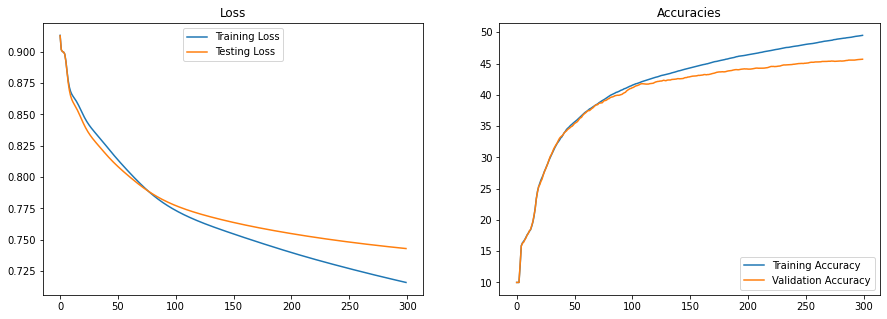

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(train_loss_history, label = 'Training Loss')
ax[0].plot(test_loss_history, label = 'Testing Loss')
ax[0].legend(loc ='upper center')
ax[0].set_title('Loss')
ax[1].plot(train_acc_history, label = 'Training Accuracy')
ax[1].plot(val_acc_history, label = 'Validation Accuracy')
ax[1].legend(loc='lower right')
ax[1].set_title('Accuracies')
plt.show()

Part 4

In [16]:
print(tf.__version__)

#mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()


print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))
	# compile model
#opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	 
'''
        model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
'''
opt = keras.optimizers.SGD(lr=0.001, momentum=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

'''
# fit model
print(model.summary())
#history = model.fit(train_images, train_labels, epochs=300, batch_size=50, verbose=1)#validation_data=(test_images, test_labels),
#model.fit(train_images, train_labels, epochs=2)

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#print('\nTest accuracy:', test_acc)


2.4.1
train_images.shape:  (50000, 32, 32, 3)
train_labels.shape:  (50000, 1)
test_images.shape: (10000, 32, 32, 3)
test_labels.shape: (10000, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4

In [17]:
training_history = model.fit(train_images, train_labels,epochs=100, batch_size=50, validation_data=(test_images,  test_labels), verbose = 2)

Epoch 1/100
1000/1000 - 4s - loss: 2.1127 - accuracy: 0.2436 - val_loss: 1.9864 - val_accuracy: 0.3065
Epoch 2/100
1000/1000 - 3s - loss: 1.9101 - accuracy: 0.3295 - val_loss: 1.8463 - val_accuracy: 0.3517
Epoch 3/100
1000/1000 - 3s - loss: 1.7834 - accuracy: 0.3762 - val_loss: 1.7253 - val_accuracy: 0.3958
Epoch 4/100
1000/1000 - 3s - loss: 1.6922 - accuracy: 0.4061 - val_loss: 1.6587 - val_accuracy: 0.4107
Epoch 5/100
1000/1000 - 3s - loss: 1.6282 - accuracy: 0.4259 - val_loss: 1.5964 - val_accuracy: 0.4344
Epoch 6/100
1000/1000 - 3s - loss: 1.5811 - accuracy: 0.4421 - val_loss: 1.5571 - val_accuracy: 0.4477
Epoch 7/100
1000/1000 - 3s - loss: 1.5421 - accuracy: 0.4525 - val_loss: 1.5403 - val_accuracy: 0.4485
Epoch 8/100
1000/1000 - 3s - loss: 1.5092 - accuracy: 0.4647 - val_loss: 1.4915 - val_accuracy: 0.4698
Epoch 9/100
1000/1000 - 3s - loss: 1.4810 - accuracy: 0.4750 - val_loss: 1.4583 - val_accuracy: 0.4823
Epoch 10/100
1000/1000 - 3s - loss: 1.4569 - accuracy: 0.4808 - val_loss:

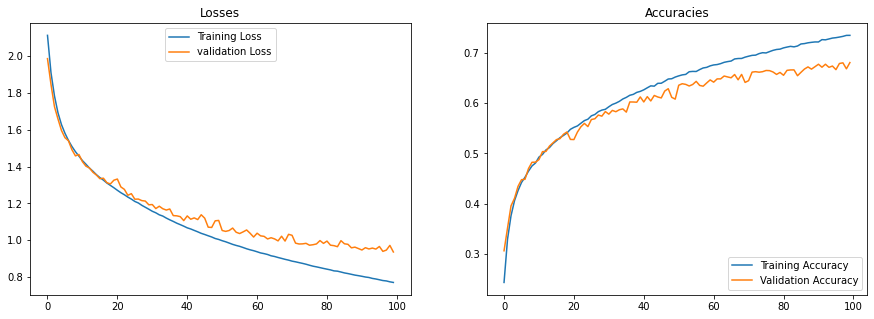

In [18]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(range(100), training_history.history['loss'], label = 'Training Loss')
ax[0].plot(range(100), training_history.history['val_loss'], label= 'validation Loss')
ax[0].legend(loc ='upper center')
ax[0].set_title('Losses')
ax[1].plot(range(100), training_history.history['accuracy'], label = 'Training Accuracy')
ax[1].plot(range(100), training_history.history['val_accuracy'], label = 'Validation Accuracy')
ax[1].legend(loc='lower right')
ax[1].set_title('Accuracies')
plt.show()